In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
# Install Java, Spark, and Findspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CloudETL").config("spark.driver.extraClassPath","/content/postgresql-42.2.9.jar").getOrCreate()

from pyspark import SparkFiles
url="https://qos-bucket.s3.us-east-2.amazonaws.com/credit_default.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("credit_default.csv"), sep=",", header=True, inferSchema=True)

df = df.select("*").toPandas()


df = df.dropna()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
#testing with all possible features
X = df.drop(['default payment next month', 'ID'], axis=1)
y = df["default payment next month"]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train.values.reshape(-1, 1))
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
train_scores = []
test_scores = []

for k in range(1, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}')

k: 1, Train/Test Score: 1.000/0.688
k: 3, Train/Test Score: 0.845/0.734
k: 5, Train/Test Score: 0.816/0.755
k: 7, Train/Test Score: 0.804/0.760
k: 9, Train/Test Score: 0.800/0.768
k: 11, Train/Test Score: 0.794/0.774
k: 13, Train/Test Score: 0.791/0.774
k: 15, Train/Test Score: 0.792/0.772
k: 17, Train/Test Score: 0.789/0.776
k: 19, Train/Test Score: 0.789/0.777
k: 21, Train/Test Score: 0.787/0.777
k: 23, Train/Test Score: 0.786/0.779


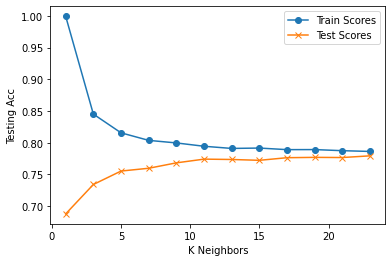

In [21]:
plt.plot(range(1, 25, 2), train_scores, marker='o', label='Train Scores')
plt.plot(range(1, 25, 2), test_scores, marker="x", label='Test Scores')
plt.xlabel('K Neighbors')
plt.ylabel('Testing Acc')
plt.legend()
plt.show()

In [19]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print(f'Test score(k=15): {knn.score(X_test_scaled, y_test)}')

Test score(k=15): 0.7736


In [20]:
#no = 6461   yes=1039
from sklearn.metrics import confusion_matrix
predictions = knn.predict(X_test)
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[5873,    0],
       [1627,    0]])